### Part 1 - 7-day moving average of Covid-19 daily cases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
covid_df = pd.read_csv(url)
covid_df["Moving_Average"] = np.nan

In [3]:
covid_df.to_csv("data/WHO-COVID-19-global-data.csv")

In [4]:
covid_df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Moving_Average
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,NaN
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,NaN
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,NaN
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,NaN
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,NaN


In [5]:
countries = covid_df.Country.unique().tolist()

In [6]:
# Check if new_cases for each country has the same length
new_cases_length = [len(covid_df[covid_df["Country"] == countries[i]]["New_cases"]) for i in range(len(countries))]    
new_cases_length = np.unique(np.array(new_cases_length))
print(new_cases_length)

[331 332]


In [7]:
# Compute the 7-day moving average and apply to the Moving_Average column  
for i in range(len(countries)):    
    covid_df.loc[covid_df["Country"] == countries[i], ["Moving_Average"]] = covid_df[covid_df["Country"] == countries[i]].New_cases.rolling(window=7, min_periods=1).mean()

In [8]:
covid_df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Moving_Average
77953,2020-11-25,ZW,Zimbabwe,AFRO,90,9398,1,274,64.714286
77954,2020-11-26,ZW,Zimbabwe,AFRO,110,9508,0,274,75.285714
77955,2020-11-27,ZW,Zimbabwe,AFRO,115,9623,0,274,82.428571
77956,2020-11-28,ZW,Zimbabwe,AFRO,91,9714,1,275,84.857143
77957,2020-11-29,ZW,Zimbabwe,AFRO,108,9822,0,275,100.285714


In [9]:
# Define biggest countries
biggest_countries = ["United States of America", "Canada", "Brazil", "Mexico",
                    "Germany", "France", "Italy", "Spain", "Netherlands", "Austria", "Greece", "Denmark",
                    "Sweden", "Norway", "Switzerland", "The United Kingdom", "Russian Federation", "Turkey", "Poland",
                    "Hungary", "South Africa", "Japan", "Australia", "New Zealand", "Singapore", "China", "India",
                    "Thailand", "Indonesia", "Republic of Korea"]

In [10]:
# Initialise Dataframe
MA_cases_df = pd.DataFrame(np.nan,
                           index=range(max(new_cases_length)),
                           columns=biggest_countries)

In [11]:
# Apply moving averages to the new data frame
# then rename rows to date_reported
for i in range(len(biggest_countries)):
    MA_cases_df[biggest_countries[i]] = covid_df.loc[covid_df["Country"] == biggest_countries[i], ["Moving_Average"]].squeeze().reset_index()["Moving_Average"]

MA_cases_df.index = covid_df[covid_df["Country"] == "New Zealand"]["Date_reported"]

In [12]:
# Sort countries by the 7-day moving average on the most recent date
MA_cases_sorted_df = MA_cases_df.T.sort_values(MA_cases_df.last_valid_index(), ascending=False).T
biggest_countries = MA_cases_sorted_df.columns.tolist()

# Start from Italy's first non-zero event
MA_cases_sorted_df = MA_cases_sorted_df.iloc[26:] 

In [13]:
MA_cases_sorted_df.tail()

,United States of America,India,Brazil,Mexico,Canada,Indonesia,South Africa,Japan,Republic of Korea,China,...,Greece,Denmark,Sweden,Norway,Switzerland,The United Kingdom,Russian Federation,Turkey,Poland,Hungary
Date_reported,,,,,,,,,,,,,,,,,,,,,
2020-11-25,170235.714286,44187.000000,30163.428571,5708.857143,5051.857143,4549.571429,2570.857143,2083.571429,346.285714,60.571429,...,2330.285714,1210.000000,4931.857143,524.714286,4272.142857,18294.571429,24357.857143,5643.285714,22303.714286,4105.428571
2020-11-26,170385.285714,44031.714286,29564.285714,6999.857143,5139.428571,4730.857143,2622.571429,2042.142857,380.571429,73.142857,...,2179.142857,1199.428571,5089.571429,514.428571,4097.428571,18095.142857,24626.000000,6014.571429,21657.000000,4369.428571
2020-11-27,172712.428571,43631.714286,31536.714286,7916.571429,5193.857143,4747.857143,2701.857143,2032.000000,410.000000,81.285714,...,2006.428571,1184.285714,4780.428571,499.857143,4023.142857,17329.428571,25086.714286,6348.000000,20616.285714,4648.428571
2020-11-28,166574.000000,42930.285714,31779.000000,8435.857143,5335.142857,4895.857143,2739.714286,2057.571429,424.571429,91.000000,...,1925.000000,1193.714286,4000.142857,472.714286,3933.428571,16541.857143,25412.142857,6560.714286,19879.142857,4915.714286
2020-11-29,164379.142857,42444.714286,31169.428571,9243.714286,5477.857143,4955.857143,2818.571429,2067.714286,441.571429,97.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Normalise each column for better heatmap visualisation
MA_cases_sorted_normalised = MA_cases_sorted_df.T.div(MA_cases_sorted_df.T.max(axis=1), axis=0)

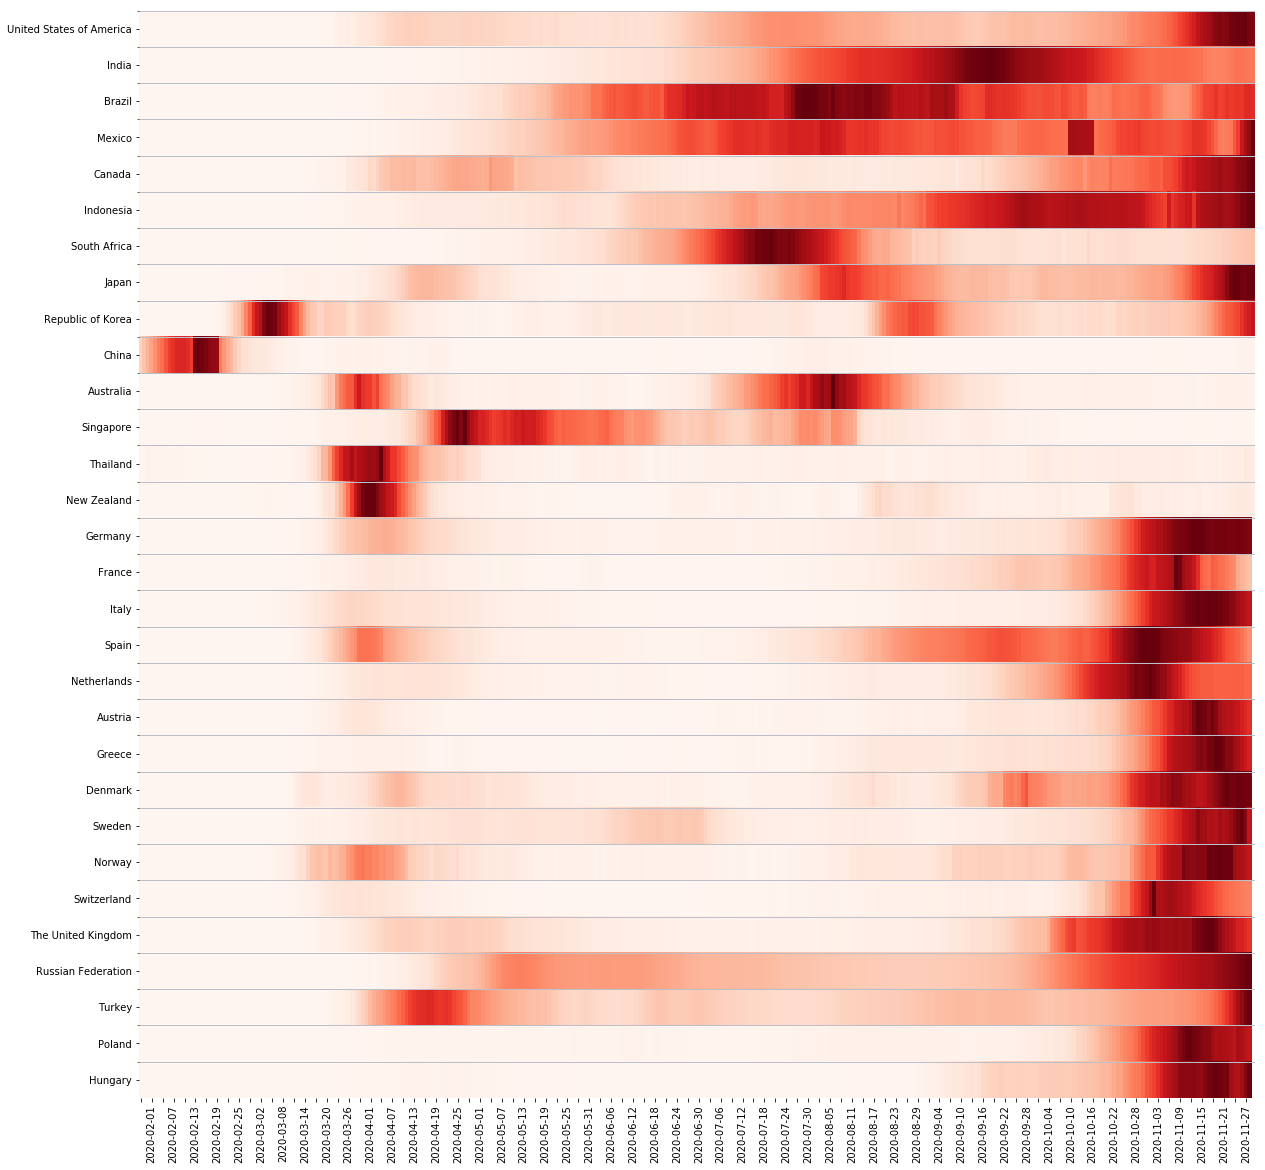

In [15]:
# Plot heatmap of sorted 7-day moving average daily cases for biggest countries
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(MA_cases_sorted_normalised, cmap="Reds", cbar=False)

# Minor ticks
ax.set_yticks(np.arange(0, len(biggest_countries[1:len(biggest_countries)])+1, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='#bbbfca', linestyle='-', linewidth=1)

# Hide every 2nd x-axis tick
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)
    
# Hide x-axis label
ax.xaxis.label.set_visible(False)

### Part 2 - Case-fatality ratio

In [16]:
# Initialise dataframe
case_fatality_df = pd.DataFrame(np.nan,
                               index=biggest_countries,
                               columns=["Cumulative_cases", "Cumulative_deaths", "Ratio (%)"])

In [17]:
for i in range(len(biggest_countries)):
    case_fatality_df["Cumulative_cases"].iloc[i:i+1] = covid_df[covid_df["Country"] == biggest_countries[i]]["Cumulative_cases"].iloc[-1]
    case_fatality_df["Cumulative_deaths"].iloc[i:i+1] = covid_df[covid_df["Country"] == biggest_countries[i]]["Cumulative_deaths"].iloc[-1]
    case_fatality_df["Ratio (%)"].iloc[i:i+1] = (case_fatality_df["Cumulative_deaths"].iloc[i:i+1] / case_fatality_df["Cumulative_cases"].iloc[i:i+1])*100

In [18]:
case_fatality_sorted_df = case_fatality_df.sort_values(["Ratio (%)"], ascending=False)

In [19]:
case_fatality_sorted_df.head()

,Cumulative_cases,Cumulative_deaths,Ratio (%)
Mexico,1090675.0,104873.0,9.615422
China,93329.0,4750.0,5.089522
The United Kingdom,1589305.0,57551.0,3.621143
Italy,1538217.0,53677.0,3.489560
Canada,359064.0,11894.0,3.312501


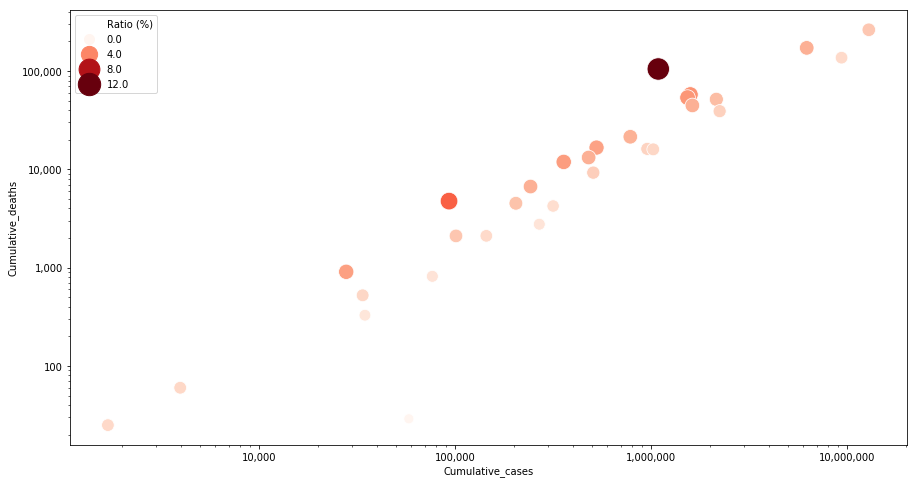

In [20]:
# Scatterplot of the case fatalities
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=case_fatality_sorted_df, x="Cumulative_cases", y="Cumulative_deaths",
                hue="Ratio (%)", size="Ratio (%)", sizes=(100,500), palette="Reds")

ax.set_yscale('log')
ax.set_xscale('log')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

### Part 3 - Apple Community Mobility Tracker

In [21]:
# source data: https://covid19.apple.com/mobility
filename = "applemobilitytrends-2020-11-27.csv"
covid_mobility_df = pd.read_csv(f"data/{filename}")

/Users/paddy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
covid_mobility_df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,90.14,97.88,99.05,111.07,115.80,99.44,97.01,94.64,91.62,108.34
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,121.41,126.01,120.09,123.58,107.08,128.61,119.49,122.56,118.68,134.67
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,70.25,73.21,91.41,99.28,72.55,59.53,60.29,63.91,72.30,91.13
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,57.55,60.21,70.59,68.75,45.72,42.96,49.73,53.32,59.24,71.76
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,101.82,109.64,108.84,91.48,95.10,99.52,103.98,107.94,117.86,114.10


In [23]:
# Re-define biggest countries 
# Change 3 countries that's different in this CSV
countries_for_mobility = ["United States", "Canada", "Brazil", "Mexico",
                    "Germany", "France", "Italy", "Spain", "Netherlands", "Austria", "Greece", "Denmark",
                    "Sweden", "Norway", "Switzerland", "United Kingdom", "Russia", "Turkey", "Poland",
                    "Hungary", "South Africa", "Japan", "Australia", "New Zealand", "Singapore", "India",
                    "Thailand", "Indonesia", "Republic of Korea"]

In [24]:
mobility_dates = covid_mobility_df[covid_mobility_df["region"] == countries_for_mobility[0]].columns[6:].tolist()

In [25]:
# Initialise dataframe
mobility_average_df = pd.DataFrame(data=np.nan,
                                  index=mobility_dates,
                                  columns=countries_for_mobility)

In [26]:
# Compute means for each country
for country in range(len(countries_for_mobility)):
    averages = []
    for i in range(mobility_average_df.shape[0]):
        means = covid_mobility_df[covid_mobility_df["region"] == countries_for_mobility[country]].iloc[:, i+6:i+7].values.mean()
        averages.append(means)
    averages = pd.Series(averages).rolling(window=7, min_periods=1).mean().tolist()
    mobility_average_df[countries_for_mobility[country]] = averages

In [27]:
# Sort countries by the 7-day moving average on the most recent date
mobility_average_sorted_df = mobility_average_df.T.sort_values(mobility_average_df.last_valid_index(), ascending=False).T
countries_for_mobility = mobility_average_sorted_df.columns.tolist()

In [28]:
mobility_average_sorted_df.tail()

,India,Japan,Russia,Denmark,South Africa,Turkey,Thailand,Brazil,Switzerland,Australia,...,Poland,Spain,Netherlands,United Kingdom,Hungary,Austria,France,Republic of Korea,Greece,Italy
2020-11-23,135.389286,134.648095,107.431429,100.000952,91.410000,105.430714,99.563571,91.776667,85.934286,83.503333,...,71.408571,69.359048,67.310000,67.688095,67.228571,56.377857,53.160476,56.559286,50.092857,47.442381
2020-11-24,134.428571,133.196667,107.615000,99.606667,91.467857,102.409286,100.216429,92.137143,85.609524,84.061429,...,71.078571,69.482857,67.711429,67.797143,66.788571,56.967143,53.755238,56.250000,49.637857,47.590476
2020-11-25,134.665714,132.296667,108.262857,99.266667,92.730000,100.251429,98.337143,92.141429,85.680000,85.053333,...,70.785000,69.463810,67.830952,67.918095,65.603571,56.947143,53.855714,56.209286,49.958571,47.585238
2020-11-26,134.322143,131.542381,108.947143,99.653810,94.636429,98.262143,96.193571,92.418571,86.349048,86.287619,...,70.508571,69.360952,68.416667,68.255238,65.180000,57.195000,54.404762,56.030000,50.433571,47.644762
2020-11-27,134.165714,128.514762,109.557857,99.402381,98.692143,96.840714,96.010714,93.519048,87.644762,87.034286,...,70.659286,69.361429,69.087143,68.634286,65.436429,57.722143,55.222381,54.199286,50.934286,48.259524


In [29]:
# Define country lists for use in the subplots
americas = ["United States", "Canada", "Brazil", "Mexico"]
europe   = ["Germany", "France", "Italy", "Spain", "Netherlands", "Austria", "Greece", "Denmark",
            "Sweden", "Norway", "Switzerland", "United Kingdom", "Russia", "Turkey", "Poland",
            "Hungary", "South Africa"]
asia     = ["Japan", "Australia", "New Zealand", "Singapore", "India",
            "Thailand", "Indonesia", "Republic of Korea"]

continents = [americas, europe, asia]
continent_titles = ["Americas", "Europe", "Asia"]

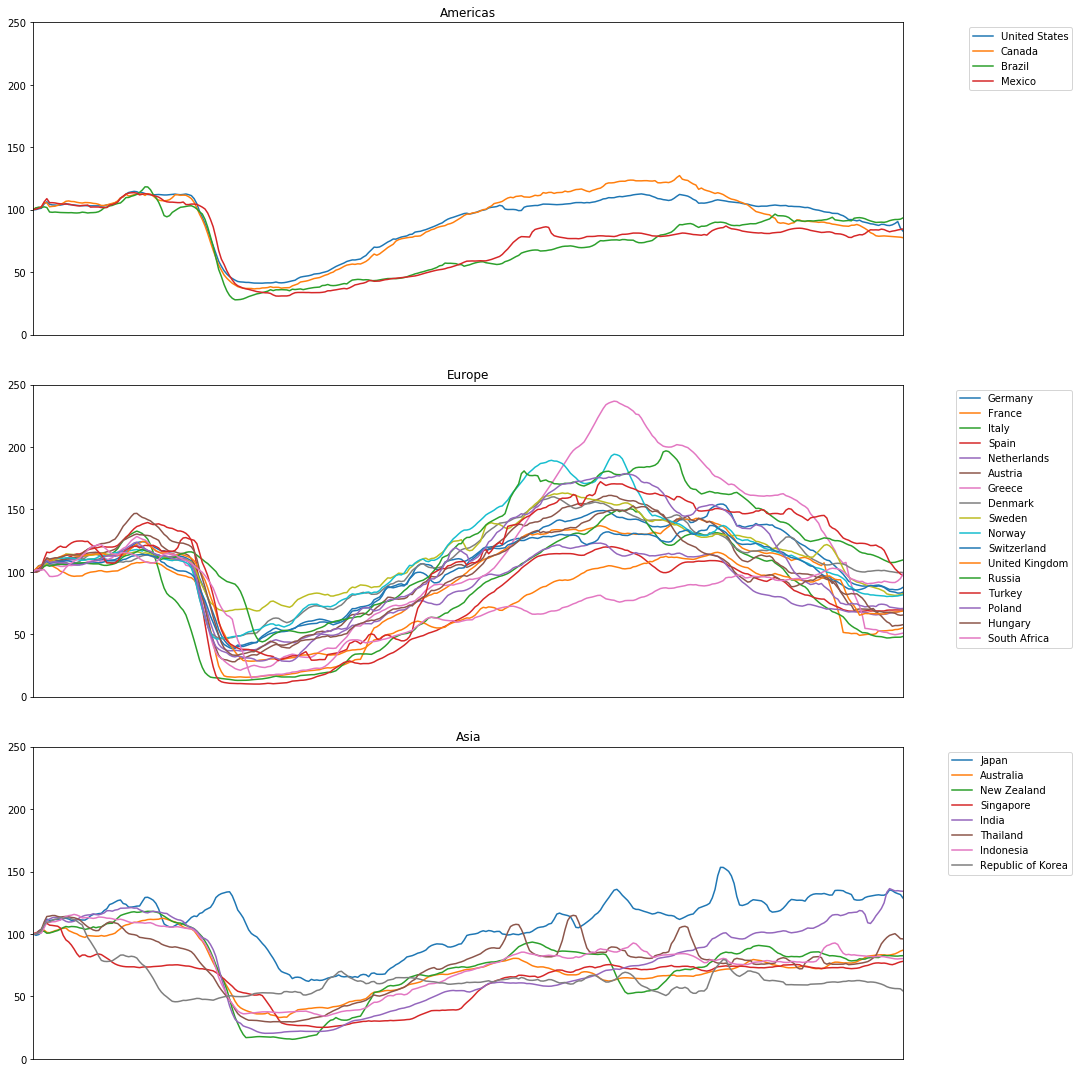

In [30]:
# 7-day moving average of each country's mobility trends
fig, ax1 = plt.subplots(figsize=(15,15), nrows=3, ncols=1)

for i in range(len(continents)):
    country = continents[i]
    for j in range(len(country)):    
        ax1[i].plot(mobility_average_sorted_df.index, mobility_average_sorted_df[country[j]], label=country[j])
        ax1[i].xaxis.set_visible(False)
        ax1[i].autoscale(enable=True, axis='x', tight=True)
        ax1[i].set_ylim(0,250)
        ax1[i].set_title(continent_titles[i])
        ax1[i].legend(bbox_to_anchor=(1.2, 1), loc='upper right')
        
fig.tight_layout()
plt.show()